In [2]:
import tensorflow as tf
print(tf.__version__)
tf.test.gpu_device_name() # Check whether GPU is available

2.8.0


'/device:GPU:0'

**Mount to Drive**

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls

Mounted at /content/gdrive
gdrive	sample_data


**Extract Dataset**

In [4]:
from tqdm import tqdm
import zipfile

with zipfile.ZipFile('/content/gdrive/MyDrive/Dataset/Cats-and-Dogs-Breed-Clasification.zip','r') as zf:
    for member in tqdm(zf.infolist(), desc='Extracting '):
        try:
            zf.extract(member, '/content/Dataset')
        except zipfile.error as e:
            pass

Extracting : 100%|██████████| 2025/2025 [00:02<00:00, 792.04it/s] 


**Add some libraris**

In [70]:
# Libraries for do visualization
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for do computational things
import numpy as np
import pandas as pd


import datetime
import os
# For read the image
import glob as gb

# For evaluate the model
from sklearn.metrics import classification_report, confusion_matrix

# from tensorflow.keras.applications.mobilenetv2
from tensorflow.keras import Sequential, regularizers
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.backend import clear_session
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import load_model

In [8]:
DATASET_PATH = '/content/Dataset/Cats and Dogs Breed Clasification'

os.listdir(DATASET_PATH)

['train', 'test']

In [9]:
TRAIN_DIR = os.path.join(DATASET_PATH, 'train')
TEST_DIR = os.path.join(DATASET_PATH, 'test')

In [11]:
import glob as gb
def img_count_in_dataset(FOLDER_PATH):  
  print('-'*60)
  for folder in os.listdir(FOLDER_PATH):
    files=gb.glob(pathname=str(FOLDER_PATH + '/' + folder + '/*.jpg'))
    print(f'{len(files):4} gambar yang ditemukan di dalam folder {folder}')
  print('-'*60)

In [13]:
print("TRAIN DIR")
img_count_in_dataset(TRAIN_DIR)

TRAIN DIR
------------------------------------------------------------
 150 gambar yang ditemukan di dalam folder Pug
 150 gambar yang ditemukan di dalam folder Shiba Inu
 150 gambar yang ditemukan di dalam folder Persian
 150 gambar yang ditemukan di dalam folder Beagle
 150 gambar yang ditemukan di dalam folder Pomeranian
 150 gambar yang ditemukan di dalam folder Abyssinian
 150 gambar yang ditemukan di dalam folder Chihuahua
 150 gambar yang ditemukan di dalam folder Siamese
 150 gambar yang ditemukan di dalam folder British Shorthair
 150 gambar yang ditemukan di dalam folder Bombay
------------------------------------------------------------


In [15]:
print("TEST DIR")
img_count_in_dataset(TEST_DIR)

TEST DIR
------------------------------------------------------------
  50 gambar yang ditemukan di dalam folder Pug
  50 gambar yang ditemukan di dalam folder Shiba Inu
  50 gambar yang ditemukan di dalam folder Persian
  50 gambar yang ditemukan di dalam folder Beagle
  50 gambar yang ditemukan di dalam folder Pomeranian
  50 gambar yang ditemukan di dalam folder Abyssinian
  50 gambar yang ditemukan di dalam folder Chihuahua
  50 gambar yang ditemukan di dalam folder Siamese
  50 gambar yang ditemukan di dalam folder British Shorthair
  50 gambar yang ditemukan di dalam folder Bombay
------------------------------------------------------------


**Image Segmentation**

In [34]:
img_list =['/content/Dataset/Cats and Dogs Breed Clasification/train/Abyssinian/Abyssinian_1.jpg', '/content/Dataset/Cats and Dogs Breed Clasification/train/Abyssinian/Abyssinian_10.jpg']

(-0.5, 149.5, 149.5, -0.5)

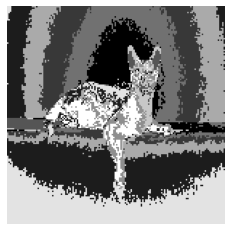

In [36]:
from google.colab import files
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np
from sklearn.cluster import KMeans

# fig = plt.figure(figsize=()
filename = 'Abyssinian_1.jpg'

img = image.load_img(
    img_list[0],
    target_size=(150, 150)
)




x = image.img_to_array(img)/255
# x = np.expand_dims(x, axis=0)
kmeans = KMeans(10)
kmeans.fit(x.reshape(-1, 3))
x_segment = kmeans.predict(x.reshape(-1, 3)).reshape(x.shape[0], x.shape[1])



# ax = fig.add_subplot(n_files, 1, i+1)
plt.imshow(x_segment,'gray')
plt.axis(False)

(-0.5, 149.5, 149.5, -0.5)

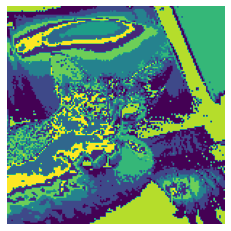

In [39]:
from google.colab import files
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np
from sklearn.cluster import KMeans

# fig = plt.figure(figsize=()
filename = 'Abyssinian_1.jpg'

img = image.load_img(
    img_list[1],
    target_size=(150, 150)
)




x = image.img_to_array(img)/255
# x = np.expand_dims(x, axis=0)
kmeans = KMeans(10)
kmeans.fit(x.reshape(-1, 3))
x_segment = kmeans.predict(x.reshape(-1, 3)).reshape(x.shape[0], x.shape[1])



# ax = fig.add_subplot(n_files, 1, i+1)
plt.imshow(x_segment)
plt.axis(False)

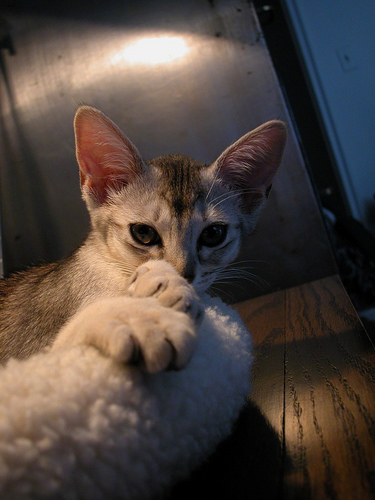

In [40]:
from google.colab.patches import cv2_imshow
import cv2

img = cv2.imread(img_list[1])
cv2_imshow(img)

In [41]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

pixel_values = img.reshape((-1, 3))

pixel_values = np.float32(pixel_values)
print(pixel_values.shape)

(187500, 3)


In [42]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

In [43]:
k=4

_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

<function matplotlib.pyplot.show>

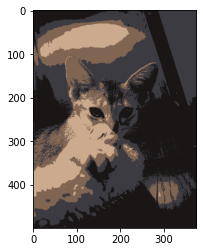

In [44]:
centers=np.uint8(centers)
labels = labels.flatten()

segmented_img = centers[labels.flatten()]
segmented_img = segmented_img.reshape(img.shape)
plt.imshow(segmented_img)
plt.show

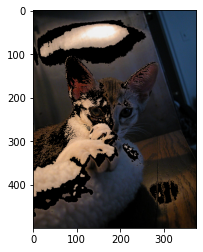

In [45]:
masked_img =  np.copy(img)
masked_img = masked_img.reshape((-1, 3))
cluster = 2
masked_img[labels==cluster] = [0, 0, 0]
masked_img = masked_img.reshape(img.shape)

plt.imshow(masked_img)
plt.show()

In [46]:
def img_segmentation(img, k=4):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img_path, cv2.COLOR_BGR2RGB)
  img = img_path
  pixel_values = img.reshape((-1, 3))
  pixel_values = np.float32(pixel_values)

  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

  _, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
  centers=np.uint8(centers)
  labels = labels.flatten()
  segmented_img = centers[labels.flatten()]
  segmented_img = segmented_img.reshape(img.shape)
  masked_img =  np.copy(img)
  masked_img = masked_img.reshape((-1, 3))
  cluster = 2
  masked_img[labels==cluster] = [0, 0, 0]
  masked_img = masked_img.reshape(img.shape)

  return masked_img


# img_segment = img_segmentation(img_list[0])
# plt.imshow(img_segment)

**Image Preprocessing**

In [47]:
train_path = '/content/Dataset/Cats and Dogs Breed Clasification/train'
test_path = '/content/Dataset/Cats and Dogs Breed Clasification/test'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20, 
    width_shift_range=0.2,  
    height_shift_range=0.2, 
    shear_range=0.2, 
    horizontal_flip=True, 
    zoom_range=0.2
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_set = train_datagen.flow_from_directory(
    directory=train_path,
    target_size=(224,224),
    class_mode='categorical',
    batch_size=30,
    color_mode='rgb'
)

val_set = validation_datagen.flow_from_directory(
    directory=test_path,
    target_size=(224,224),
    class_mode='categorical',
    batch_size=30,
    color_mode='rgb'
)

breed_dict = train_set.class_indices
print(breed_dict)

Found 1500 images belonging to 10 classes.
Found 500 images belonging to 10 classes.
{'Abyssinian': 0, 'Beagle': 1, 'Bombay': 2, 'British Shorthair': 3, 'Chihuahua': 4, 'Persian': 5, 'Pomeranian': 6, 'Pug': 7, 'Shiba Inu': 8, 'Siamese': 9}


In [49]:
# # Create variabel X_train and y_train
X_train, y_train = train_set.next()

# Create variabel X_val and y_val
X_val, y_val = val_set.next()

In [50]:
X_train.shape

(30, 224, 224, 3)

In [51]:
class_dict = {v : k for k, v in train_set.class_indices.items()}

def plot_augmented_imgs(X, y):
  labels=[]
  y_label = np.argmax(y, axis=1)
  
  for label in y_label:
    labels.append(class_dict[label])

  for idx in range(0,10):
      plt.figure(figsize=(5, 5))
      plt.imshow(X[idx])
      plt.title(labels[idx])

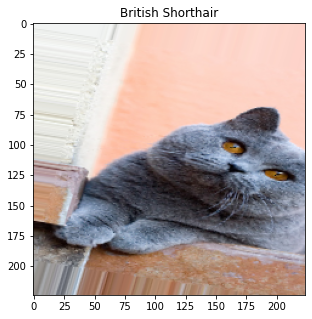

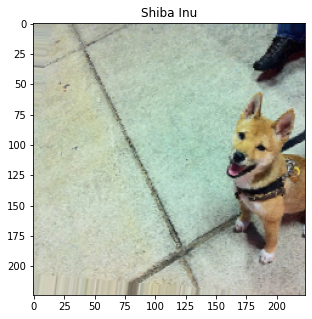

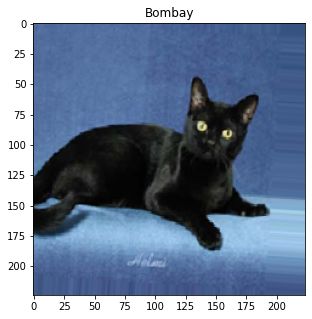

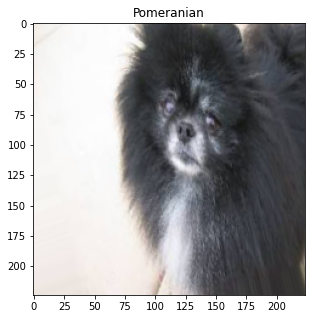

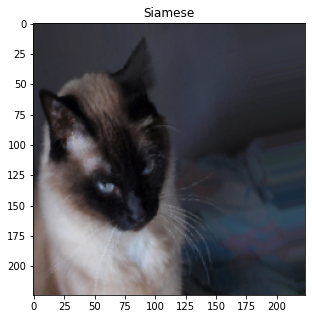

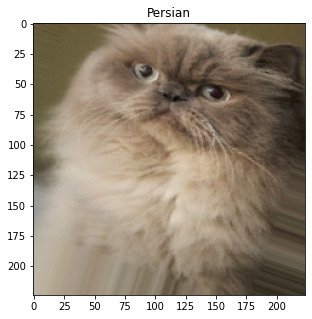

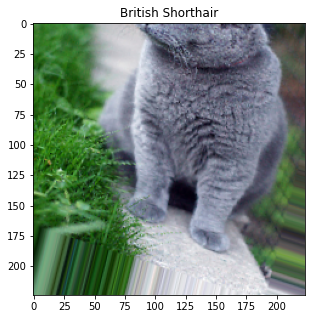

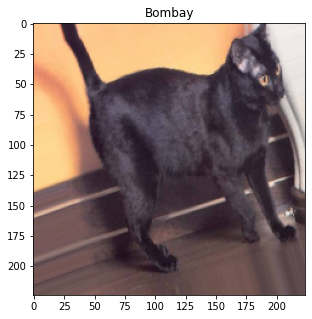

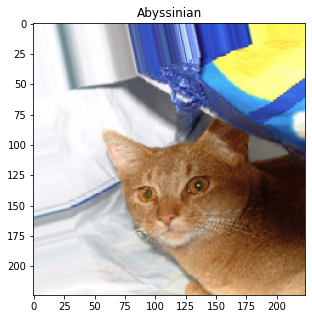

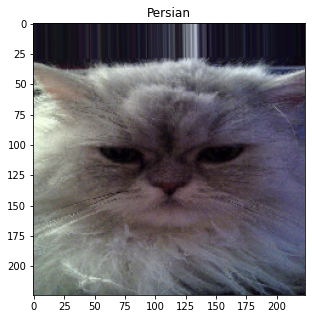

In [52]:
plot_augmented_imgs(X_train, y_train)

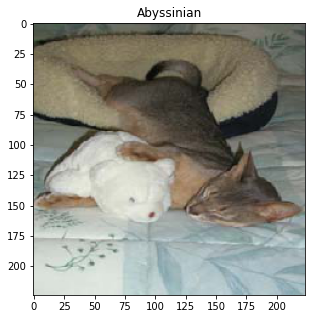

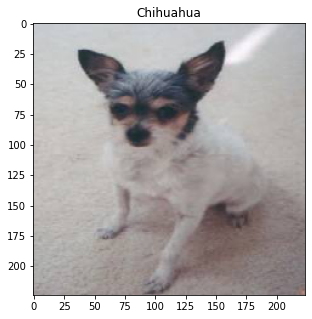

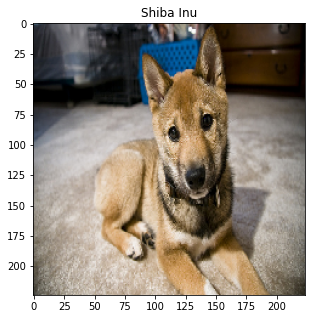

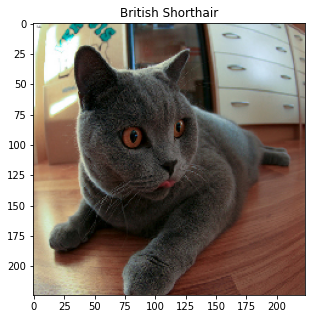

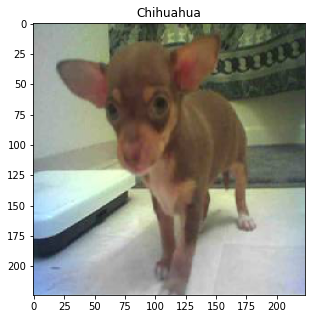

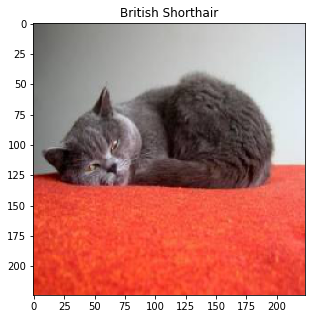

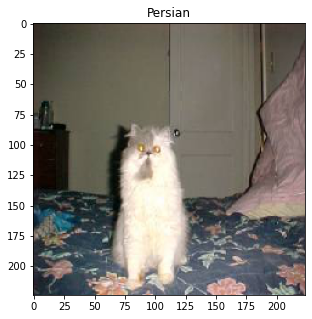

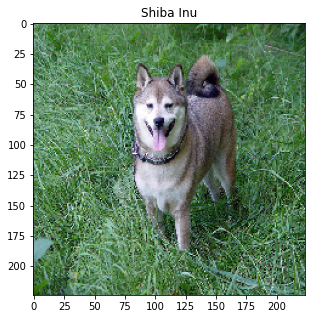

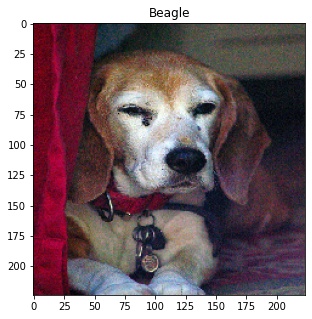

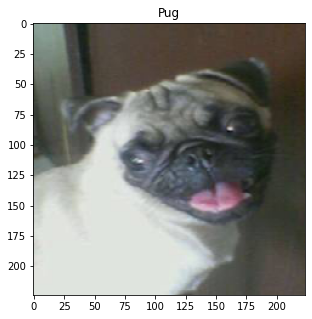

In [53]:
plot_augmented_imgs(X_val, y_val)

**Build The Model**

In [56]:
val_set.class_indices

{'Abyssinian': 0,
 'Beagle': 1,
 'Bombay': 2,
 'British Shorthair': 3,
 'Chihuahua': 4,
 'Persian': 5,
 'Pomeranian': 6,
 'Pug': 7,
 'Shiba Inu': 8,
 'Siamese': 9}

In [60]:
def evaluate_model(model, X, y):
  print('Loss of the model is - ', model.evaluate(X, y)[0])
  print('Accuracy of the model is - ', model.evaluate(X, y)[1]*100, '%')
  predict = model.predict(X)
  # print(predict)
  predict = np.argmax(predict, axis=1)
  predict = predict.reshape(1, -1)[0]
  y_label = np.argmax(y, axis=1)
  print(classification_report(y_label, predict, target_names =['Abyssinian','Beagle', 'Bombay','British Shorthair','Chihuahua','Persian', 'Pomeranian','Pug', 'Shiba Inu','Siamese']))

  conf_matrix = confusion_matrix(y_label, predict)
  # print(conf_matrix)
  df_cm = pd.DataFrame(conf_matrix, index = [i for i in ('Abyssinian','Beagle', 'Bombay','British Shorthair','Chihuahua','Persian', 'Pomeranian','Pug', 'Shiba Inu','Siamese')],
                  columns = [i for i in ('Abyssinian','Beagle', 'Bombay','British Shorthair','Chihuahua','Persian', 'Pomeranian','Pug', 'Shiba Inu','Siamese')])
  plt.figure(figsize = (3, 3))
  sns.heatmap(df_cm, annot=True)

plt.style.use('seaborn-whitegrid')

def plot_acc(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  epochs = range(len(acc))
  plt.subplot(1, 2, 1)
  acc_plot, = plt.plot(epochs, acc, 'orange')
  val_acc_plot, = plt.plot(epochs, val_acc, 'blue')
  plt.title('Training and Validation Accuracy')
  plt.legend([acc_plot, val_acc_plot], ['Training Accuracy', 'Validation Accuracy'])


def plot_loss(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(loss))
  plt.subplot(1, 2, 2)
  loss_plot, = plt.plot(epochs, loss, 'orange')
  val_loss_plot, = plt.plot(epochs, val_loss, 'blue')
  plt.title('Training and Validation Loss')
  plt.legend([loss_plot, val_loss_plot], ['Training Loss', 'Validation Loss'])

def plot_hist(history):
  plt.figure(figsize=(15,5))
  plot_acc(history)
  plot_loss(history)

**Transfer learning using mobilenetv2**

In [66]:
base_model = MobileNetV2(
    include_top=False,
    weights='imagenet',
    input_shape=(224, 224, 3),
    alpha=1.0,
    pooling='avg' # Add GlobalAvgPool2D() layer as its final layer
)

base_model.trainable = False

In [67]:
def scheduler(epoch, lr):
  if epoch <= 20:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

lr_callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [68]:
EPOCHS = 35
LEARNING_RATE = 1e-4
TRAIN_STEP = 1500//32
VAL_STEP = 500//32

In [71]:
clear_session()

model = Sequential([
    base_model,
    Dense(150, activation='relu',
        kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)
    ),
    Dropout(0.25),
    Dense(10, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=LEARNING_RATE),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

model.summary()

history = model.fit(
    train_set,
    validation_data=val_set,
    steps_per_epoch=TRAIN_STEP,
    validation_steps=VAL_STEP,
    shuffle=True,
    epochs=EPOCHS,
    callbacks=[lr_callback]
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 1280)             2257984   
 ional)                                                          
                                                                 
 dense (Dense)               (None, 150)               192150    
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1510      
                                                                 
Total params: 2,451,644
Trainable params: 193,660
Non-trainable params: 2,257,984
_________________________________________________________________
Epoch 1/35
46/46 [==============================] - 38s 551ms/step - loss: 1.9166 - accuracy: 0.4029 - val

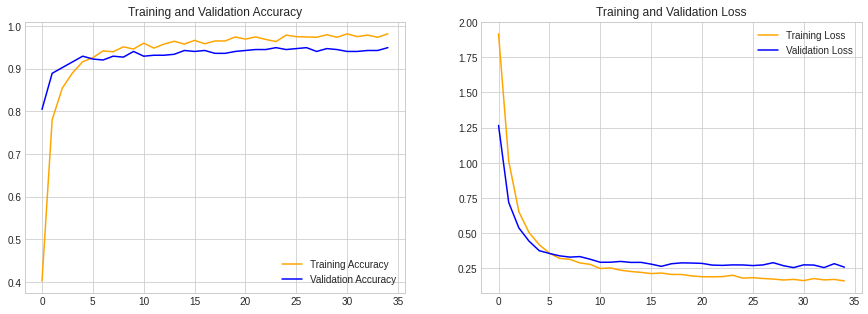

In [72]:
plot_hist(history)

In [ ]:
1e-8

1/1 [==============================] - 1s 1s/step - loss: 0.4464 - accuracy: 0.9333
Loss of the model is -  0.44642671942710876
1/1 [==============================] - 0s 149ms/step - loss: 0.4464 - accuracy: 0.9333
Accuracy of the model is -  93.33333373069763 %
                   precision    recall  f1-score   support

       Abyssinian       1.00      1.00      1.00         3
           Beagle       1.00      1.00      1.00         5
           Bombay       1.00      1.00      1.00         2
British Shorthair       0.75      1.00      0.86         6
        Chihuahua       1.00      1.00      1.00         2
          Persian       1.00      1.00      1.00         3
       Pomeranian       1.00      1.00      1.00         1
              Pug       1.00      1.00      1.00         2
        Shiba Inu       1.00      0.60      0.75         5
          Siamese       1.00      1.00      1.00         1

         accuracy                           0.93        30
        macro avg       0.9

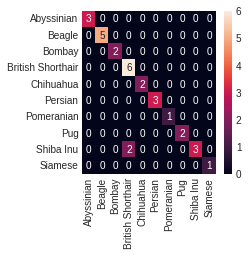

In [73]:
evaluate_model(model, X_val, y_val)

In [75]:
test_dir = '/content/Dataset/Cats and Dogs Breed Clasification/test'

for motive in motives_dict.keys():
    images_list = os.listdir(os.path.join(test_dir, motive))    
    # plt.figure(figsize=(16, 20))

    correct_count = 0

    for idx, image in enumerate(images_list):
        img_path = f'/content/Dataset/Cats and Dogs Breed Clasification/test/{motive}/{image}'
        img = load_img(img_path, target_size=(224, 224))

        img_array = img_to_array(img) / 255.0
        img_array = tf.expand_dims(img_array, 0)

        motives_list = list(motives_dict.keys())
        prediction = model(img_array)
        pred_idx = np.argmax(prediction)
        pred_motive = motives_list[pred_idx]
        pred_confidence = prediction[0][pred_idx] * 100

        if pred_motive == motive:
            correct_count += 1

        # plt.subplot(5, 4, idx+1)
        # plt.title(f'Actual: {motive}\nPrediction: {pred_motive} {pred_confidence:.2f}%')
        # plt.imshow(img)
        # plt.axis('off')
    
    print(f'{motive} Predictions --> {correct_count}/50 correct')
# plt.show()

Abyssinian Predictions --> 47/50 correct
Beagle Predictions --> 49/50 correct
Bombay Predictions --> 49/50 correct
British Shorthair Predictions --> 46/50 correct
Chihuahua Predictions --> 48/50 correct
Persian Predictions --> 46/50 correct
Pomeranian Predictions --> 50/50 correct
Pug Predictions --> 49/50 correct
Shiba Inu Predictions --> 43/50 correct
Siamese Predictions --> 45/50 correct


In [85]:
model_save_path = "saved_model/catsdogsclasiffier5"
tf.saved_model.save(model, model_save_path)

model.save("saved_model/catsdogsclasiffier5.h5")

# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model(model_save_path) # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
os.makedirs('tflite_models')
with open('tflite_models/catsdogsclasiffier.tflite', 'wb') as f:
  f.write(tflite_model)


INFO:tensorflow:Assets written to: saved_model/catsdogsclasiffier5/assets


INFO:tensorflow:Assets written to: saved_model/catsdogsclasiffier5/assets


In [77]:
model.save("saved_model/catsdogsclasiffier5.h5")

In [87]:
!zip -r /content/catsdogsclasiffier.zip /content/saved_model

  adding: content/saved_model/ (stored 0%)
  adding: content/saved_model/catsdogsclasiffier5.h5 (deflated 9%)
  adding: content/saved_model/catsdogsclasiffier5/ (stored 0%)
  adding: content/saved_model/catsdogsclasiffier5/saved_model.pb (deflated 91%)
  adding: content/saved_model/catsdogsclasiffier5/variables/ (stored 0%)
  adding: content/saved_model/catsdogsclasiffier5/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: content/saved_model/catsdogsclasiffier5/variables/variables.index (deflated 75%)
  adding: content/saved_model/catsdogsclasiffier5/assets/ (stored 0%)
